In [1]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# geopandas 및 관련 패키지 설치
!pip install geopandas folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

한글 폰트 설치 후에는 런타임 재시작이 필요합니다.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') #한글 폰트 적용

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
# 종분포 데이터
gdf_pt = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_mbris_obis_edu_light2.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11041 entries, 0 to 11040
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spc_scitf_nm  11041 non-null  object  
 1   comm_kor_nm   8148 non-null   object  
 2   genus         11034 non-null  object  
 3   genus_nm      8180 non-null   object  
 4   family        11037 non-null  object  
 5   family_nm     8146 non-null   object  
 6   order_        11037 non-null  object  
 7   order_nm      8098 non-null   object  
 8   class         11041 non-null  object  
 9   class_nm      8572 non-null   object  
 10  phylum        11041 non-null  object  
 11  phylum_nm     10328 non-null  object  
 12  kingdom       11041 non-null  object  
 13  kingdom_nm    11041 non-null  object  
 14  lati_val      11041 non-null  float64 
 15  loti_val      11041 non-null  float64 
 16  col_bg_dt     11041 non-null  object  
 17  ssea_id       11041 non-null  object  
 18

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,Bacillus pumilus,NaN,Bacillus,NaN,Bacillaceae,NaN,Caryophanales,NaN,Bacilli,NaN,...,NaN,Bacteria,세균계,37.284444,126.556389,20090325,W,5154-4,mbris,POINT (126.55639 37.28444)
1,Aetea anguina,자루이끼벌레,Aetea,자루이끼벌레속,Aeteidae,자루이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
2,Cellaria punctata,마디이끼벌레,Cellaria,마디이끼벌레속,Cellariidae,마디이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
3,Cellaria punctata,마디이끼벌레,Cellaria,마디이끼벌레속,Cellariidae,마디이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
4,Reteporellina denticulata,등색망이끼벌레,Reteporellina,망이끼벌레속,Phidoloporidae,연구멍이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)


### 종분포와 해양생물해역을 공간조인

In [7]:
# 해양생물해역
gdf_area = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_zn_ocn_lvb_sarea.shp', encoding="UTF-8")
gdf_area.info()
gdf_area.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         5 non-null      int64   
 1   sarea_korn  5 non-null      object  
 2   ssea_id     5 non-null      object  
 3   geometry    5 non-null      geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 288.0+ bytes


,gid,sarea_korn,ssea_id,geometry
0,5,동해남부,ES,"POLYGON ((129.66570 35.06455, 129.40532 34.971..."
1,4,남해동부,SE,"POLYGON ((127.82165 33.16382, 127.80000 33.121..."
2,3,서해,W,"POLYGON ((127.00000 38.00000, 127.00000 35.300..."
3,2,남해서부,SW,"POLYGON ((126.27256 30.28900, 126.21167 30.271..."
4,1,동해중부,EM,"POLYGON ((132.14285 36.50000, 129.30000 36.500..."


In [8]:
# 종분포(포인트)에  해양물리를 공간조인  
gdf_pt2 = gpd.sjoin(gdf_pt, gdf_area )
gdf_pt2.info()
gdf_pt2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11041 entries, 0 to 11040
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   spc_scitf_nm   11041 non-null  object  
 1   comm_kor_nm    8148 non-null   object  
 2   genus          11034 non-null  object  
 3   genus_nm       8180 non-null   object  
 4   family         11037 non-null  object  
 5   family_nm      8146 non-null   object  
 6   order_         11037 non-null  object  
 7   order_nm       8098 non-null   object  
 8   class          11041 non-null  object  
 9   class_nm       8572 non-null   object  
 10  phylum         11041 non-null  object  
 11  phylum_nm      10328 non-null  object  
 12  kingdom        11041 non-null  object  
 13  kingdom_nm     11041 non-null  object  
 14  lati_val       11041 non-null  float64 
 15  loti_val       11041 non-null  float64 
 16  col_bg_dt      11041 non-null  object  
 17  ssea_id_left   11041 no

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,loti_val,col_bg_dt,ssea_id_left,sstrnc_no,kind,geometry,index_right,gid,sarea_korn,ssea_id_right
0,Bacillus pumilus,NaN,Bacillus,NaN,Bacillaceae,NaN,Caryophanales,NaN,Bacilli,NaN,...,126.556389,20090325,W,5154-4,mbris,POINT (126.55639 37.28444),2,3,서해,W
740,Coelorinchus multispinulosus,줄비늘치,Coelorinchus,꼬리민태속,Macrouridae,민태과,Gadiformes,대구목,Actinopterygii,조기강,...,123.750000,20110810,W,227-5,mbris,POINT (123.75000 33.25000),2,3,서해,W
741,Johnius grypotus,민태,Johnius,민태속,Sciaenidae,민어과,Perciformes,농어목,Actinopterygii,조기강,...,124.292150,20110405,W,228-5,mbris,POINT (124.29215 33.25232),2,3,서해,W
1079,Echelus uropterus,날붕장어,Echelus,날붕장어속,Ophichthidae,바다뱀장어과,Anguilliformes,뱀장어목,Actinopterygii,조기강,...,124.447661,20180422,W,228-6,mbris,POINT (124.44766 33.29058),2,3,서해,W
1080,Xiphias gladius,황새치,Xiphias,황새치속,Xiphiidae,황새치과,Perciformes,농어목,Actinopterygii,조기강,...,124.447661,20200724,W,228-6,mbris,POINT (124.44766 33.29058),2,3,서해,W


### 해양생물해역별 종별 개체 수 집계

In [9]:
# 해양생물해역 - 종별 건수 집계
df_size = gdf_pt2.groupby(['sarea_korn', 'spc_scitf_nm'], as_index=False ).size() 
df_size.info()
df_size.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sarea_korn    4596 non-null   object
 1   spc_scitf_nm  4596 non-null   object
 2   size          4596 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 107.8+ KB


,sarea_korn,spc_scitf_nm,size
0,남해동부,Abludomelita,1
1,남해동부,Acanthochitona byungdoni,1
2,남해동부,Acanthogobius flavimanus,2
3,남해동부,Acanthogobius lactipes,2
4,남해동부,Acanthomysis stelleri,2


In [10]:
# 종-해역별 건수를 좀 더 쉽게 보기 위해 피벗
df_pivot = df_size.pivot(index='spc_scitf_nm', columns='sarea_korn', values='size') #.reset_index()
df_pivot.info()
df_pivot.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2796 entries, Abludomelita to Zunongwangia profunda
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   남해동부    828 non-null    float64
 1   남해서부    1482 non-null   float64
 2   동해남부    551 non-null    float64
 3   동해중부    849 non-null    float64
 4   서해      886 non-null    float64
dtypes: float64(5)
memory usage: 131.1+ KB


sarea_korn,남해동부,남해서부,동해남부,동해중부,서해
spc_scitf_nm,,,,,
Abludomelita,1.0,NaN,NaN,NaN,NaN
Abudefduf notatus,NaN,2.0,NaN,NaN,NaN
Abudefduf sordidus,NaN,1.0,NaN,NaN,NaN
Abudefduf vaigiensis,NaN,3.0,NaN,NaN,NaN
Acanthochitona achates,NaN,4.0,NaN,NaN,1.0


In [11]:
# 피벗 정렬
df_pivot2 = df_pivot.sort_values(by=(['남해동부','남해서부','동해남부','동해중부','서해'] ), ascending=False)
df_pivot2.head()

sarea_korn,남해동부,남해서부,동해남부,동해중부,서해
spc_scitf_nm,,,,,
Thalassiosira,31.0,3.0,NaN,NaN,4.0
Coscinodiscus,28.0,4.0,1.0,NaN,4.0
Chaetoceros,20.0,3.0,4.0,1.0,NaN
Sargassum fusiforme,14.0,26.0,1.0,3.0,17.0
Dictyota dichotoma,14.0,11.0,2.0,13.0,1.0


In [12]:
import seaborn as sns

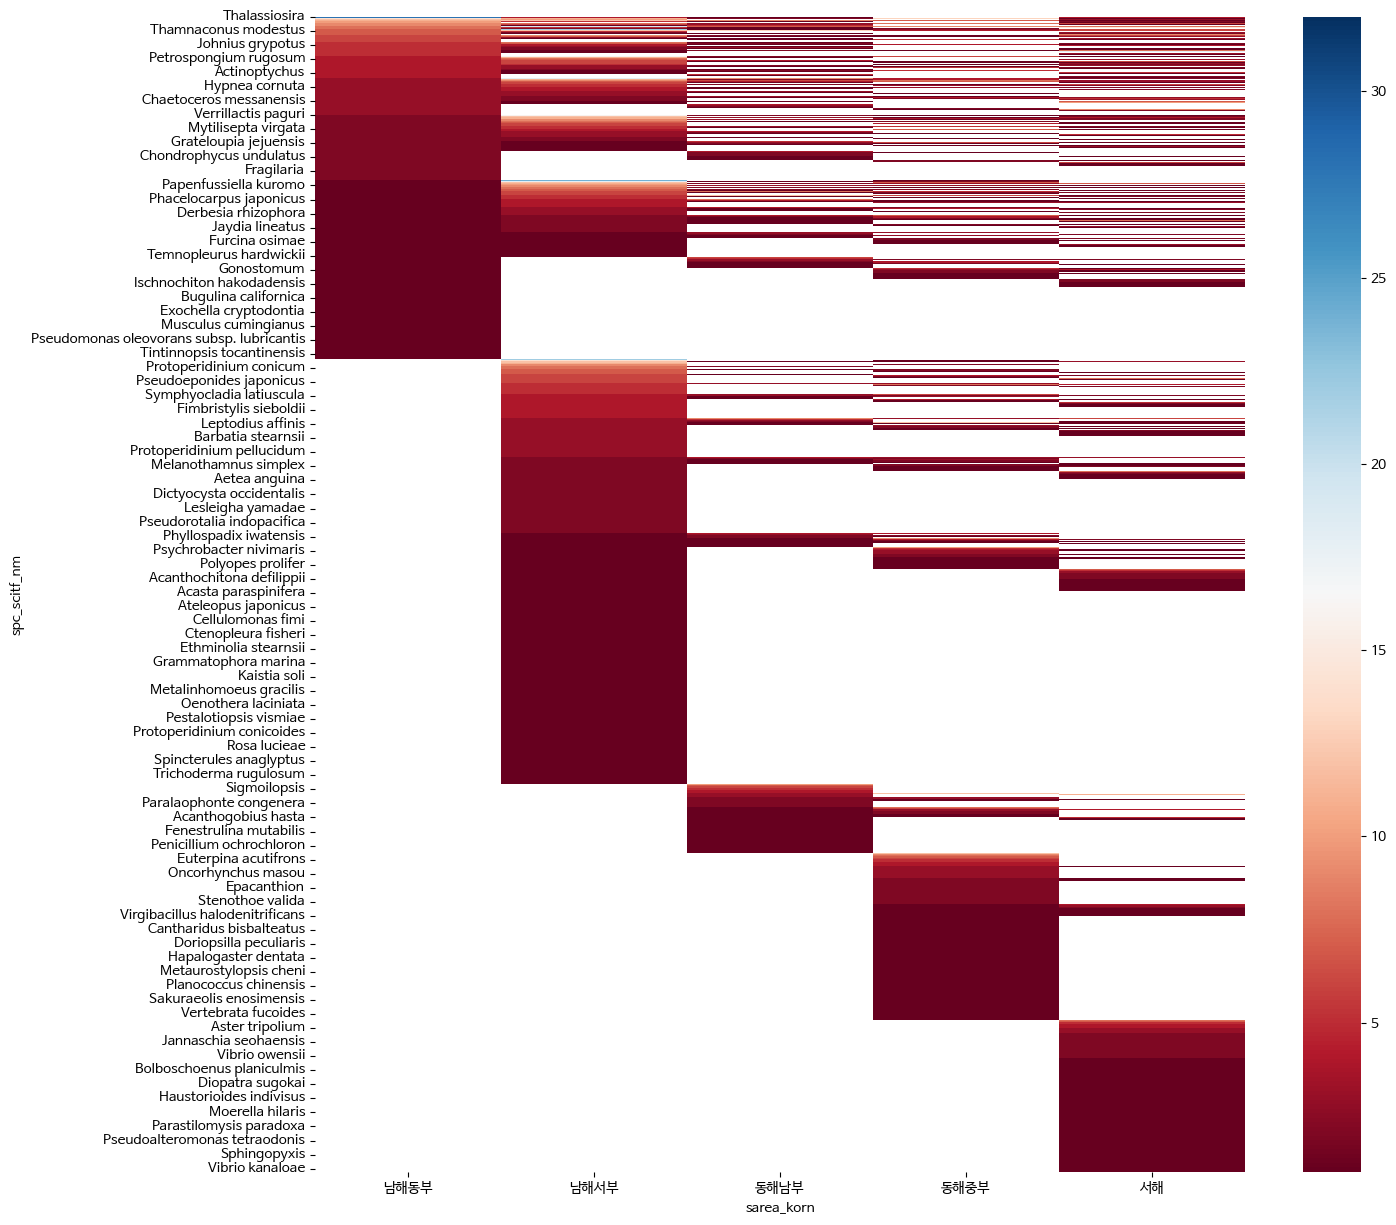

In [13]:
# 히트맵 시각화  
plt.rcParams['figure.figsize'] = [15, 15]
ax = sns.heatmap(df_pivot2, cmap="RdBu" )

In [17]:
# 집계 결과를 csv로 저장 
df_pivot.to_csv('/content/gdrive/My Drive/Colab Notebooks/sea/result/df_pivot.csv', encoding='UTF-8')

In [18]:
# 남해동부에만 분포하고, 다른 해역에는 분포하지 않는 데이터
df_pivot3 = df_pivot[ (df_pivot.notnull()['남해동부']) & (df_pivot.isnull()['남해서부']) & (df_pivot.isnull()['동해남부']) 
                     & (df_pivot.isnull()['동해중부']) & (df_pivot.isnull()['서해']) ]
df_pivot3.info()
df_pivot3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, Abludomelita to Zhouia amylolytica
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   남해동부    227 non-null    float64
 1   남해서부    0 non-null      float64
 2   동해남부    0 non-null      float64
 3   동해중부    0 non-null      float64
 4   서해      0 non-null      float64
dtypes: float64(5)
memory usage: 10.6+ KB


sarea_korn,남해동부,남해서부,동해남부,동해중부,서해
spc_scitf_nm,,,,,
Abludomelita,1.0,NaN,NaN,NaN,NaN
Acanthochitona byungdoni,1.0,NaN,NaN,NaN,NaN
Acanthomysis stelleri,2.0,NaN,NaN,NaN,NaN
Acrochaetium terminale,1.0,NaN,NaN,NaN,NaN
Actinoptychus ehrenbergii,1.0,NaN,NaN,NaN,NaN
